In [1]:
from gensim.models.fasttext import FastText
from gensim.scripts.word2vec2tensor import word2vec2tensor

In [2]:
model = FastText.load('model.bin')

In [3]:
# Taken from: https://www.kdnuggets.com/2018/04/robust-word2vec-models-gensim.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
keywords = ['leukaemia', 'dengue', 'ebola', 'flu', 'cancer', 'diabetes']

In [5]:
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn = 5)]
                  for search_term in keywords}

/mnt/Data/Miniconda3/envs/myenv/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [6]:
print(similar_words)

{'leukaemia': ['leukemia', 'pneumonia', 'zetia', 'lymphoma', 'hemophilia'], 'dengue': ['devo', 'defy', 'denial', 'argue', 'deny'], 'ebola': ['ebolaqanda', 'ebolafacts', 'ebolaoutbreak', 'cola', 'mers'], 'flu': ['fluid', 'flush', 'fl', 'tamiflu', 'fluids'], 'cancer': ['cancerous', 'cancers', 'dancer', 'cancel', 'breastcancer'], 'diabetes': ['prediabetes', 'diabetic', 'diabetics', 'diarrhea', 'cardiovascular']}


In [7]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model.wv[words]

In [8]:
print(wvs)

[[ 0.04048161  0.29528016  0.19245128 ...  0.03588386  0.03592624
   0.274686  ]
 [ 0.02471635  0.38090998  0.41199106 ... -0.05102676  0.11523227
   0.40524763]
 [ 0.0393621   0.12849629  0.24089281 ... -0.24732965 -0.00291997
   0.22317877]
 ...
 [-0.25027835 -0.06038446 -0.15499717 ...  0.15970692 -0.49406484
  -0.0849342 ]
 [-0.07643322  0.02869297  0.10518581 ...  0.01413053 -0.33214852
  -0.0086598 ]
 [-0.08999336  0.1859902  -0.04547619 ...  0.22580616 -0.0270623
   0.03313411]]


In [9]:
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 10000, perplexity = 2)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words

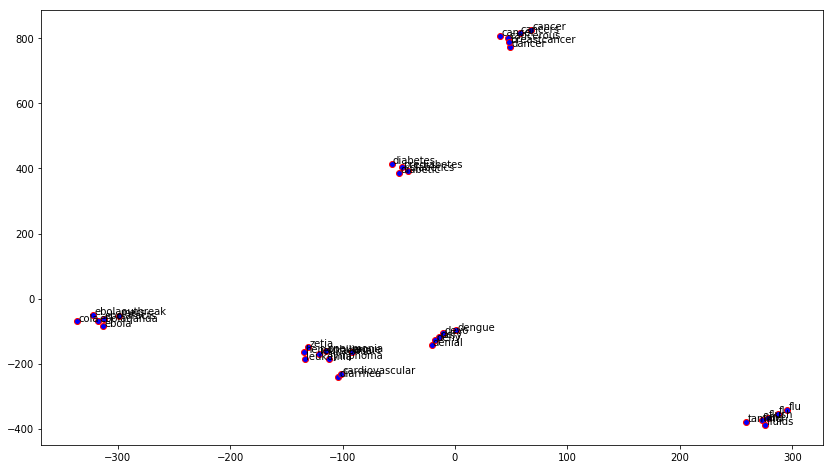

In [10]:
plt.figure(figsize = (14, 8))
plt.scatter(T[:, 0], T[:, 1], c = 'blue', edgecolors = 'r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy = (x + 1, y + 1), xytext = (0, 0), textcoords = 'offset points')
plt.show()